<a href="https://colab.research.google.com/github/yangyang1598/DSM_System/blob/main/211101_face_dector_with_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/yebiny/Face-detection-for-DSM.git

Cloning into 'Face-detection-for-DSM'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 52 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (52/52), done.


In [ ]:
import cv2, sys
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
def detect_flow(imgPath, modelDir):
    
    # read image
    img = cv2.imread(imgPath)
    (img_h, img_w) = img.shape[:2]
    print("* org img shape:", imgPath,  img.shape)
    
    # use model
    facenet = cv2.dnn.readNet(modelDir+"/deploy.prototxt",
                              modelDir+"/res10_300x300_ssd_iter_140000.caffemodel")
    
    blob = cv2.dnn.blobFromImage( img, 
                                  1.0, (300, 300),
    	                          (104.0, 177.0, 123.0))
    facenet.setInput(blob)
    detections = facenet.forward()
    print("* dections results:", detections.shape)
   
    faces=[]
    # get results from detections
    for i in range(detections.shape[2]):
      conf = detections[0,0,i,2]
      if conf <0.5:
        continue
      x1 = int(detections[0,0,i,3]*img_w)
      y1 = int(detections[0,0,i,4]*img_h)
      x2 = int(detections[0,0,i,5]*img_w)
      y2 = int(detections[0,0,i,6]*img_h)
      cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)

      face=img[y1:y2,x1:x2]
      faces.append(face)
    
    # visualize
    cv2_imshow(img)
    return faces

* org img shape: Face-detection-for-DSM/imgs/MASK.jpg (144, 351, 3)
* dections results: (1, 1, 200, 7)


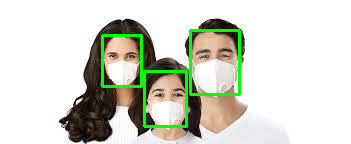

In [ ]:
imgPath = 'Face-detection-for-DSM/imgs/MASK.jpg'
#sys.argv->리눅스 환경
modelDir = 'Face-detection-for-DSM/models'
faces=detect_flow(imgPath,modelDir)
# detect_flow(imgPath, modelDir)

(51, 39, 3)
(64, 49, 3)
(55, 42, 3)


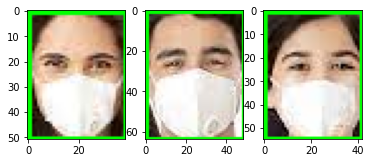

In [ ]:
for i,face in enumerate(faces):
  plt.subplot(1,3,i+1)
  print(face.shape)
  plt.imshow(cv2.cvtColor(face,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
from tensorflow.keras import applications, utils, layers, models, optimizers
faces_pre=[]
for i,face in enumerate(faces):
  face= cv2.resize(face,(224,224))
  face=applications.mobilenet_v2.preprocess_input(face)
  faces_pre.append(face)
  print(face.shape)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


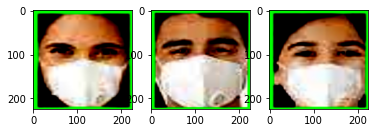

In [ ]:
for i,face in enumerate(faces_pre):
  plt.subplot(1,3,i+1)
  print(face.shape)
  plt.imshow(cv2.cvtColor(face,cv2.COLOR_BGR2RGB))
plt.show()